In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
def getNa(df):
    for col in df.columns:
        percentage = np.mean(df[col].isnull())*100
        print('{} - {}%'.format(col, percentage))


In [3]:
houses = pd.read_csv("train.csv")
houses.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


many features need encoding "SaleCondition" for example

In [4]:
getNa(houses)

Id - 0.0%
MSSubClass - 0.0%
MSZoning - 0.0%
LotFrontage - 17.73972602739726%
LotArea - 0.0%
Street - 0.0%
Alley - 93.76712328767123%
LotShape - 0.0%
LandContour - 0.0%
Utilities - 0.0%
LotConfig - 0.0%
LandSlope - 0.0%
Neighborhood - 0.0%
Condition1 - 0.0%
Condition2 - 0.0%
BldgType - 0.0%
HouseStyle - 0.0%
OverallQual - 0.0%
OverallCond - 0.0%
YearBuilt - 0.0%
YearRemodAdd - 0.0%
RoofStyle - 0.0%
RoofMatl - 0.0%
Exterior1st - 0.0%
Exterior2nd - 0.0%
MasVnrType - 0.547945205479452%
MasVnrArea - 0.547945205479452%
ExterQual - 0.0%
ExterCond - 0.0%
Foundation - 0.0%
BsmtQual - 2.5342465753424657%
BsmtCond - 2.5342465753424657%
BsmtExposure - 2.6027397260273974%
BsmtFinType1 - 2.5342465753424657%
BsmtFinSF1 - 0.0%
BsmtFinType2 - 2.6027397260273974%
BsmtFinSF2 - 0.0%
BsmtUnfSF - 0.0%
TotalBsmtSF - 0.0%
Heating - 0.0%
HeatingQC - 0.0%
CentralAir - 0.0%
Electrical - 0.0684931506849315%
1stFlrSF - 0.0%
2ndFlrSF - 0.0%
LowQualFinSF - 0.0%
GrLivArea - 0.0%
BsmtFullBath - 0.0%
BsmtHalfBath - 0.0

Some interesting fetures that need encoding could be "KitchenQual", "Functional", "HeatingQC, "CentralAir"

In [5]:
features = [
    'MSSubClass',
    'LotArea',
    'OverallQual',
    'OverallCond',
    'YearBuilt',
    'YearRemodAdd',
    '1stFlrSF',
    '2ndFlrSF',
    'LowQualFinSF',
    'GrLivArea',
    'FullBath',
    'HalfBath',
    'BedroomAbvGr',
    'KitchenAbvGr',
    'TotRmsAbvGrd',
    'Fireplaces',
    'WoodDeckSF',
    'OpenPorchSF',
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'PoolArea',
    'MiscVal',
    'MoSold',
    'YrSold',
]

In [6]:
X = houses[features]
y = houses.SalePrice

In [7]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

Validation MAE for Random Forest Model: 17,906


## View graphs

C:\Users\Mina\AppData\Local\Temp/ipykernel_18376/3472473994.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


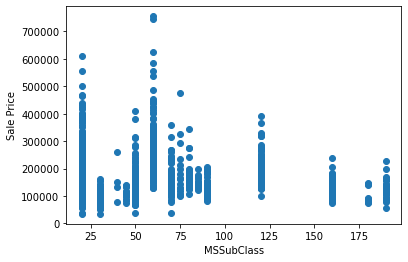

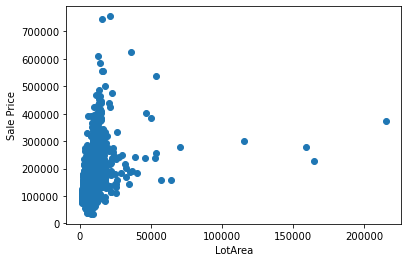

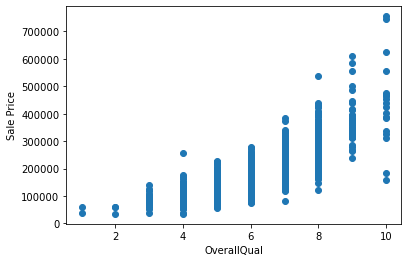

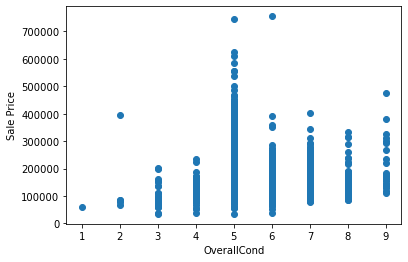

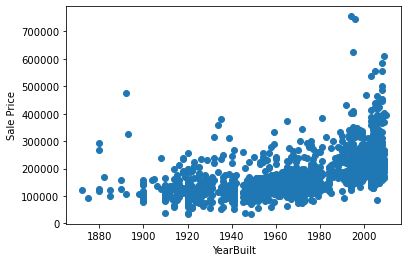

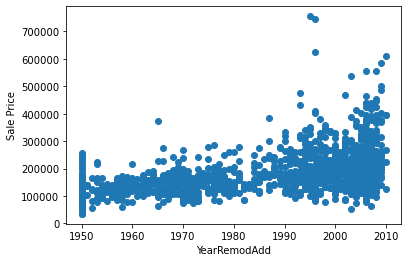

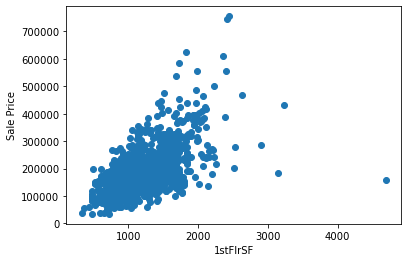

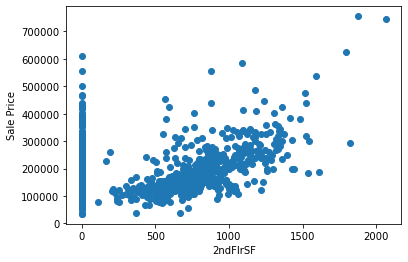

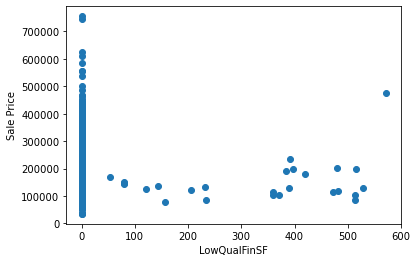

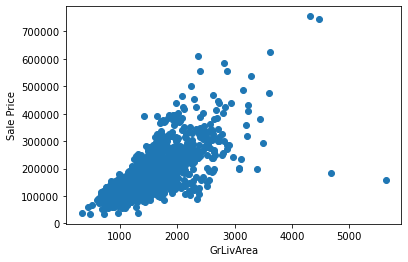

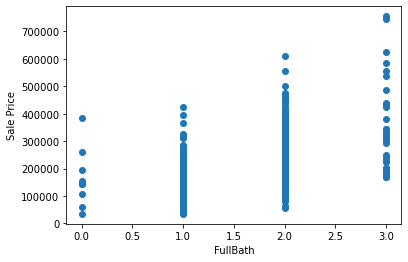

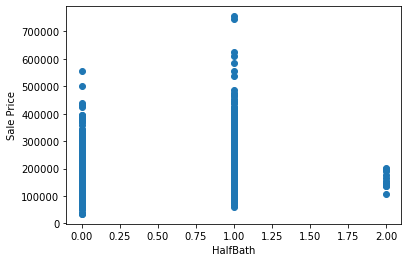

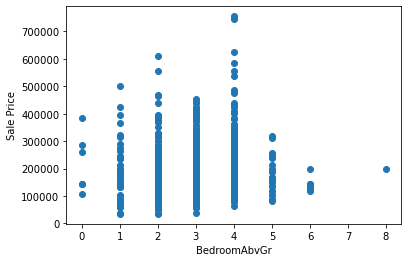

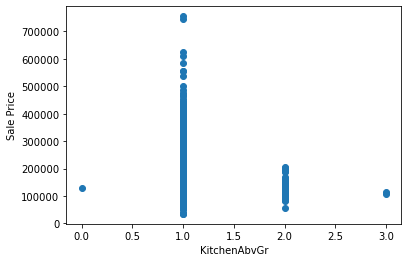

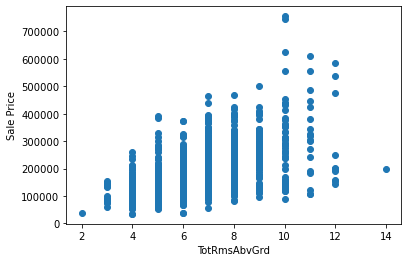

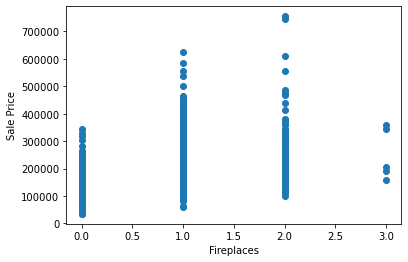

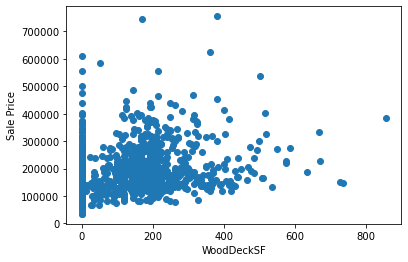

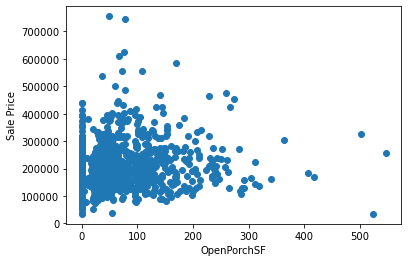

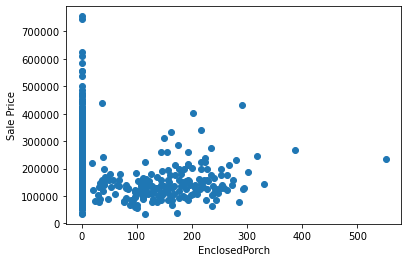

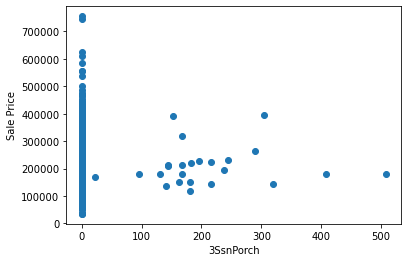

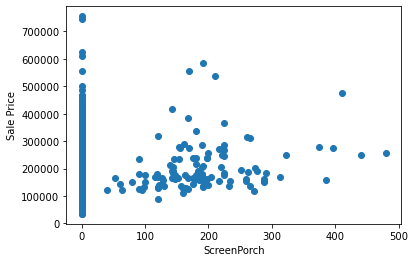

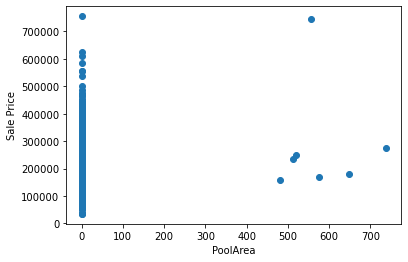

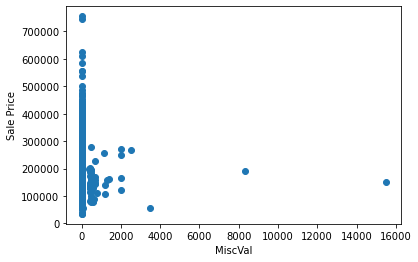

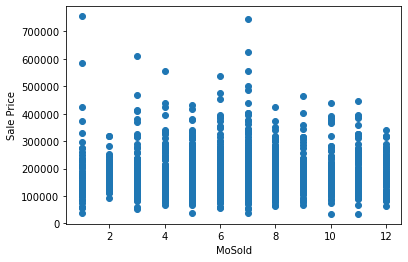

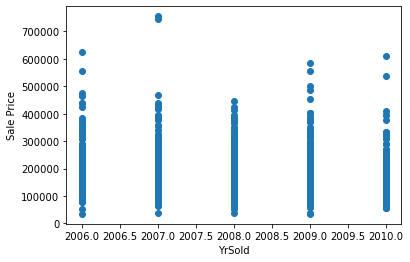

<Figure size 432x288 with 0 Axes>

In [8]:
for feature in features:
    plt.xlabel(feature)
    plt.ylabel("Sale Price")
    plt.scatter(houses[[feature]],y)
    plt.figure()

Some visible correlation in "LoaArea","OverallQual","1stFlrSF","YearRemodAdd","OverallCond","GrLivArea","YearBuilt","FullBath","TotRmsAbvGrd"?

In [9]:
features = ["LotArea","OverallQual","1stFlrSF","YearRemodAdd","OverallCond","GrLivArea","YearBuilt","FullBath","TotRmsAbvGrd"]
X = houses[features]
y = houses.SalePrice

In [10]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

Validation MAE for Random Forest Model: 18,333


## Encoding

In [11]:
def encode(df,qual):
    functionalRank = ['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ']
    enc = OrdinalEncoder(categories=[functionalRank])
    df[["Functional"]] = enc.fit_transform(df[["Functional"]])

    QCRank = ['NA','Po','Fa','TA','Gd','Ex']
    enc = OrdinalEncoder(categories=[QCRank])
    for q in qual:
        df[[q]] = enc.fit_transform(df[[q]])

    ACRank = ['N','Y']
    enc = OrdinalEncoder(categories=[ACRank])
    df[["CentralAir"]] = enc.fit_transform(df[["CentralAir"]])

In [12]:
encode(houses,["KitchenQual","HeatingQC","ExterQual", "ExterCond"])
encoded = [
    "Functional",
    "KitchenQual",
    "HeatingQC",
    "CentralAir",
    "ExterQual",
    "ExterCond",
]

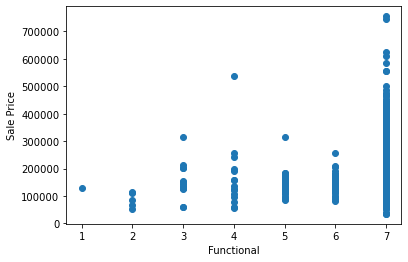

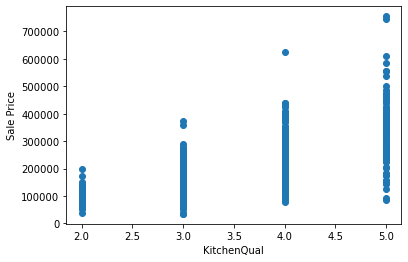

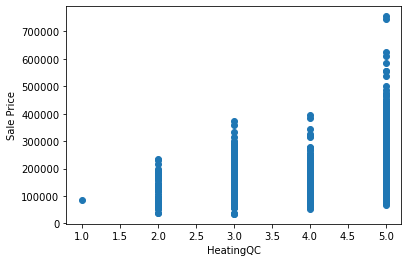

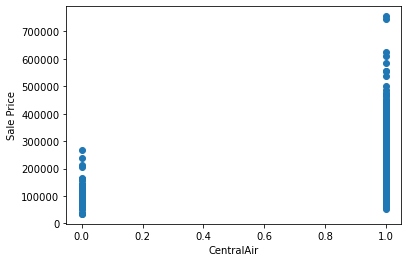

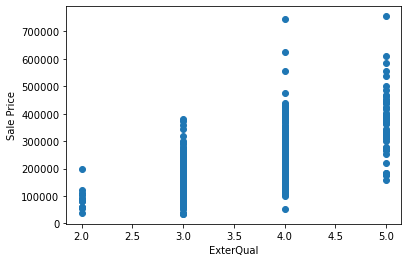

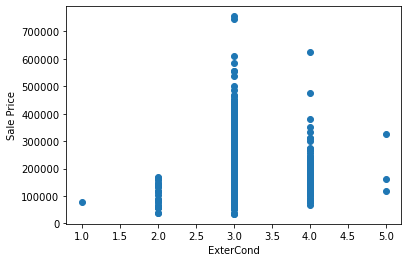

<Figure size 432x288 with 0 Axes>

In [13]:
for feature in encoded:
    plt.xlabel(feature)
    plt.ylabel("Sale Price")
    plt.scatter(houses[[feature]],y)
    plt.figure()

In [14]:
features = features + [
    "Functional",
    "KitchenQual",
    "HeatingQC",
    "CentralAir",
    "ExterQual",
]
X = houses[features]
y = houses.SalePrice

In [15]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

Validation MAE for Random Forest Model: 17,806


## Train on full data

In [16]:
rf_model_on_full_data = RandomForestRegressor(random_state=1)
rf_model_on_full_data.fit(X, y)

RandomForestRegressor(random_state=1)

# Generate Solution

## Clean Data and encode

In [17]:
test_data = pd.read_csv("test.csv")
test_X = test_data[features]
getNa(test_X)
print("-------------------------")
test_X.Functional = test_X.Functional.fillna("Typ")
test_X.KitchenQual = test_X.KitchenQual.fillna("TA")
encode(test_X,["KitchenQual","HeatingQC","ExterQual"])
getNa(test_X)

LotArea - 0.0%
OverallQual - 0.0%
1stFlrSF - 0.0%
YearRemodAdd - 0.0%
OverallCond - 0.0%
GrLivArea - 0.0%
YearBuilt - 0.0%
FullBath - 0.0%
TotRmsAbvGrd - 0.0%
Functional - 0.1370801919122687%
KitchenQual - 0.06854009595613435%
HeatingQC - 0.0%
CentralAir - 0.0%
ExterQual - 0.0%
-------------------------
LotArea - 0.0%
OverallQual - 0.0%
1stFlrSF - 0.0%
YearRemodAdd - 0.0%
OverallCond - 0.0%
GrLivArea - 0.0%
YearBuilt - 0.0%
FullBath - 0.0%
TotRmsAbvGrd - 0.0%
Functional - 0.0%
KitchenQual - 0.0%
HeatingQC - 0.0%
CentralAir - 0.0%
ExterQual - 0.0%


D:\Software\Anaconda\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
D:\Software\Anaconda\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
D:\Software\Anaconda\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

## Run test and generate solution

In [18]:
test_preds = rf_model_on_full_data.predict(test_X)
output = pd.DataFrame({'Id': test_data.Id,'SalePrice': test_preds})
output.to_csv('submission.csv', index=False)